In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

In [ ]:
os.getcwd()

'/content'

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
os.path.exists("/content")

True

In [ ]:
os.getcwd()

'/content'

In [ ]:
os.listdir()

['.config', 'drive', 'sample_data']

In [ ]:
os.path.exists("drive/MyDrive/p")

True

In [ ]:
os.path.exists("train")

False

In [ ]:
os.getcwd()

'/content'

In [ ]:
os.chdir('drive/MyDrive/p')

In [ ]:
train_dir = 'train'
test_dir = 'test'

In [ ]:
data = []
labels = []

In [ ]:
class_names = os.listdir(train_dir)
class_names.sort()
print(class_names)

['Aloevera', 'Amla', 'Amruta_Balli', 'Arali', 'Ashoka', 'Ashwagandha', 'Avacado', 'Bamboo', 'Basale', 'Betel', 'Betel_Nut', 'Brahmi', 'Castor', 'Curry_Leaf', 'Doddapatre', 'Ekka', 'Ganike', 'Gauva', 'Geranium', 'Henna', 'Hibiscus', 'Honge', 'Insulin', 'Jasmine', 'Lemon', 'Lemon_grass', 'Mango', 'Mint', 'Nagadali', 'Neem', 'Nithyapushpa', 'Nooni', 'Pappaya', 'Pepper', 'Pomegranate', 'Raktachandini', 'Rose', 'Sapota', 'Tulasi', 'Wood_sorel']


In [ ]:
for class_name in class_names:
    class_dir = os.path.join(train_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (150, 150))
        data.append(img)
        labels.append(class_names.index(class_name))


In [ ]:
# Convert lists to numpy arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)

# Normalize data
data /= 255.0

In [ ]:
# Convert labels to one-hot encoding
labels = to_categorical(labels, num_classes=len(class_names))

In [ ]:
print(class_names)

['Aloevera', 'Amla', 'Amruta_Balli', 'Arali', 'Ashoka', 'Ashwagandha', 'Avacado', 'Bamboo', 'Basale', 'Betel', 'Betel_Nut', 'Brahmi', 'Castor', 'Curry_Leaf', 'Doddapatre', 'Ekka', 'Ganike', 'Gauva', 'Geranium', 'Henna', 'Hibiscus', 'Honge', 'Insulin', 'Jasmine', 'Lemon', 'Lemon_grass', 'Mango', 'Mint', 'Nagadali', 'Neem', 'Nithyapushpa', 'Nooni', 'Pappaya', 'Pepper', 'Pomegranate', 'Raktachandini', 'Rose', 'Sapota', 'Tulasi', 'Wood_sorel']


In [ ]:
print(data[0])

In [ ]:
print(data[0].shape)

(150, 150, 3)


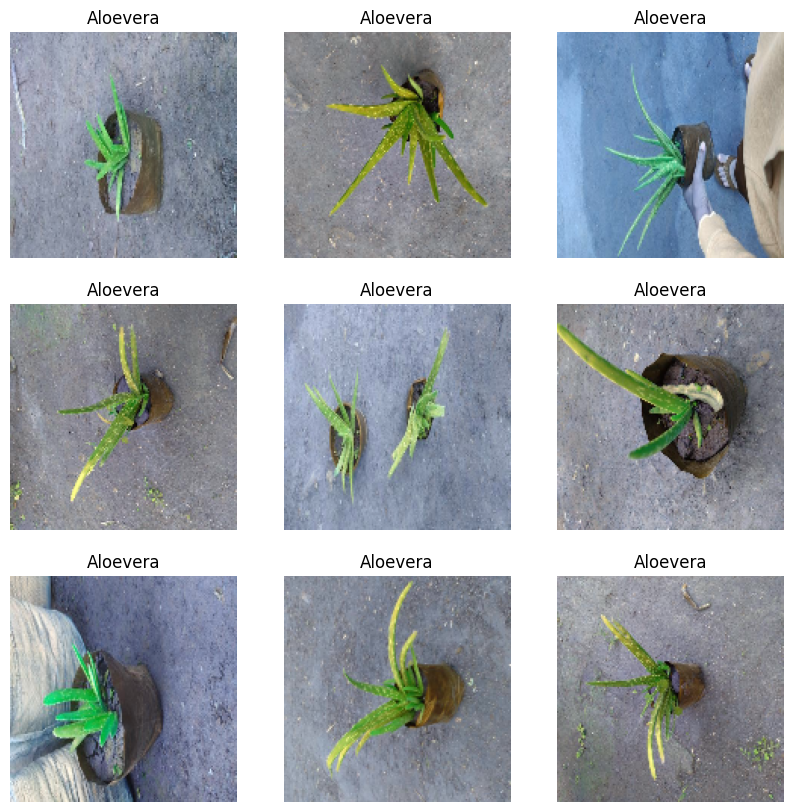

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(data[i])
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis('off')
plt.show()

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)


In [ ]:
print(X_train[0].shape)

(150, 150, 3)


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
print(y_train.shape)  # Expected to be (num_samples, 40)
print(y_val.shape)    # Expected to be (num_samples, 40)


(4752, 40)
(1189, 40)


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), callbacks=[early_stopping])

# history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
149/149 [==============================] - 261s 2s/step - loss: 3.4050 - accuracy: 0.0974 - val_loss: 2.7507 - val_accuracy: 0.2632
Epoch 2/20
149/149 [==============================] - 266s 2s/step - loss: 2.5916 - accuracy: 0.2725 - val_loss: 2.1547 - val_accuracy: 0.3793
Epoch 3/20
149/149 [==============================] - 260s 2s/step - loss: 1.9925 - accuracy: 0.4230 - val_loss: 1.7304 - val_accuracy: 0.5004
Epoch 4/20
149/149 [==============================] - 257s 2s/step - loss: 1.4965 - accuracy: 0.5495 - val_loss: 1.4242 - val_accuracy: 0.5778
Epoch 5/20
149/149 [==============================] - 258s 2s/step - loss: 1.0784 - accuracy: 0.6700 - val_loss: 1.1056 - val_accuracy: 0.6678
Epoch 6/20
149/149 [==============================] - 257s 2s/step - loss: 0.7421 - accuracy: 0.7729 - val_loss: 1.0684 - val_accuracy: 0.6888
Epoch 7/20
149/149 [==============================] - 263s 2s/step - loss: 0.5312 - accuracy: 0.8325 - val_loss: 0.9299 - val_accuracy: 0.7452

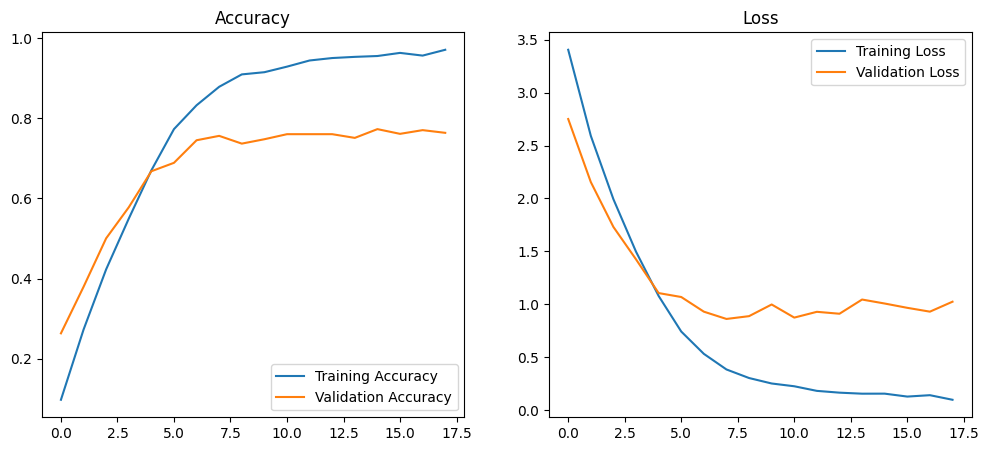

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()


In [ ]:
print("training accunracy:",history.history['accuracy'])
print("validation acc:",history.history['val_accuracy'])
print("traiing loss:",history.history['loss'])
print("validation loss",history.history['val_loss'])

training accunracy: [0.09743265807628632, 0.2725168466567993, 0.42297980189323425, 0.5494528412818909, 0.6700336933135986, 0.7729377150535583, 0.8324915766716003, 0.878577470779419, 0.9095118045806885, 0.9149831533432007, 0.9288720488548279, 0.9442340135574341, 0.9503366947174072, 0.9532828330993652, 0.9553872346878052, 0.9631733894348145, 0.9564393758773804, 0.9709596037864685]
validation acc: [0.26324641704559326, 0.37931033968925476, 0.5004205107688904, 0.577796459197998, 0.667788028717041, 0.688814103603363, 0.7451639771461487, 0.7560975551605225, 0.7367535829544067, 0.7476871609687805, 0.7603027820587158, 0.7603027820587158, 0.7603027820587158, 0.7510513067245483, 0.7729184031486511, 0.7611438035964966, 0.7703952789306641, 0.7636669278144836]
traiing loss: [3.404984712600708, 2.5915775299072266, 1.9925287961959839, 1.4965025186538696, 1.078386664390564, 0.7420722246170044, 0.5311937928199768, 0.3836755156517029, 0.30269747972488403, 0.25108546018600464, 0.22487877309322357, 0.1813

In [ ]:


def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (150, 150))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    predictions = model.predict(img)
    predicted_class = class_names[np.argmax(predictions)]
    print(f"Predicted class: {predicted_class}")

test_image_path = 'test/no.jpg'
predict_image(test_image_path)


1/1 [==============================] - 0s 146ms/step
Predicted class: Avacado


In [ ]:
def predict_image_with_confidence(image_path, confidence_threshold=0.5):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (150, 150))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    predictions = model.predict(img)
    predicted_confidence = np.max(predictions)
    if predicted_confidence > confidence_threshold:
        predicted_class = class_names[np.argmax(predictions)]
        print(f"Predicted class: {predicted_class} with confidence: {predicted_confidence:.2f}")
    else:
        print("Prediction confidence is too low. Unable to classify image.")

test_image_path = 'test/3.jpg'
predict_image_with_confidence(test_image_path, 0.5)

1/1 [==============================] - 0s 57ms/step
Predicted class: Neem with confidence: 0.93


In [ ]:
# model.save('plant_classifier_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# model.save('plant_classifier_model.keras')

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Flatten the images
num_images, img_height, img_width, img_channels = X_train.shape
x_train_flat = X_train.reshape(num_images, img_height * img_width * img_channels)

# If x_train was not normalized before, uncomment the following line
# x_train_flat = x_train_flat / 255.0


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(x_train_flat, y_train, test_size=0.2, random_state=42)


In [ ]:
# Check if y_train is one-hot encoded. If so, convert it to a 1d array of labels.
if y_train.ndim > 1 and y_train.shape[1] > 1:
    y_train = y_train.argmax(axis=1)
    y_val = y_val.argmax(axis=1)


In [ ]:
# Create an SVM model; you can adjust the kernel and other parameters as needed
model1 = svm.SVC(kernel='linear', C=1)

# Train the model
model1.fit(X_train, y_train)


SVC(C=1, kernel='linear')

In [ ]:
# Predict the labels for the training and validation set
y_train_pred = model1.predict(X_train)
y_val_pred = model1.predict(X_val)

# Calculate the accuracy for the training and validation set
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)






Training Accuracy: 1.0
Validation Accuracy: 0.5162986330178759


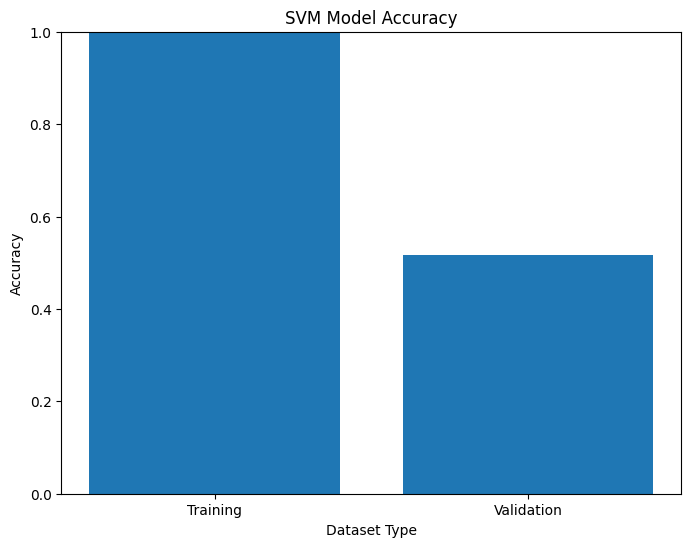

In [ ]:

# Plotting accuracies
print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")

plt.figure(figsize=(8, 6))
plt.bar(['Training', 'Validation'], [train_accuracy, val_accuracy])
plt.title('SVM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Dataset Type')
plt.ylim([0, 1])
plt.show()

In [ ]:
model1.save('plant_classifier_model_svm.h5')
model1.save('plant_classifier_model_svm.keras')

AttributeError: 'SVC' object has no attribute 'save'

In [ ]:
# a=history.history['accuracy'][-1]
# b=history.history['val_accuracy'][-1]
# c=train_accuracy
# d=val_accuracy

# names=['cnn','svm']
# train_acc=[]
# val_acc=[]
# xpos = np.arange(len(names))
# w=0.3

# plt.bar(xpos,train_acc,color='r',width=w)
# plt.bar(xpos+w,val_acc,color='g',width=w)

NameError: name 'history' is not defined